<a name="top"></a><img src="./source/SpinalHDL.png" alt="SpinalHDL based on Scala" style="width:320px;" />

  Before running Spinal HDL code, be sure to load SpinalHDL Libraries  
**Note** : This may be a little slow when the first time load, please wait a moment to download Lib from remote.)

In [ ]:
val path = System.getProperty("user.dir") + "/source/load-spinal.sc"
interp.load.module(ammonite.ops.Path(java.nio.file.FileSystems.getDefault().getPath(path)))

## Regif(Rigister Bank Solution)
**Note**: this Feature avaliable on SpinalHDL1.3.7(not release yet)
### Creat Reg

In [ ]:
class RegBankExample extends Component{
    val io = new Bundle{
      apb = Apb3(Apb3Config(16,32))
    }
    val busSlave = BusInterface(io.apb,(0x0000, 100 Byte)
    val M_REG0  = busSlave.newReg(doc="REG0")
    val M_REG1  = busSlave.newReg(doc="REG1")
    val M_REG2  = busSlave.newReg(doc="REG2")

    val M_REGn  = busSlave.newRegAt(address=0x40, doc="REGn")
    val M_REGn1 = busSlave.newReg(doc="REGn1")
  }
showRtl(new RegBankExample)

![B](./source/a.gif)

### Creat Field

 register field suport 28 AccessType 
 
 Most of these come from UVM

| AccessType | Description                                                                     | Status |
|------------|---------------------------------------------------------------------------------|--------|
| RO         | w: no effect, r: no effect                                                      | UVM    |
| RW         | w: as-is, r: no effect                                                          | UVM    |
| RC         | w: no effect, r: clears all bits                                                | UVM    |
| RS         | w: no effect, r: sets all bits                                                  | UVM    |
| WRC        | w: as-is, r: clears all bits                                                    | UVM    |
| WRS        | w: as-is, r: sets all bits                                                      | UVM    |
| WC         | w: clears all bits, r: no effect                                                | UVM    |
| WS         | w: sets all bits, r: no effect                                                  | UVM    |
| WSRC       | w: sets all bits, r: clears all bits                                            | UVM    |
| WCRS       | w: clears all bits, r: sets all bits                                            | UVM    |
| W1C        | w: 1/0 clears/no effect on matching bit, r: no effect                           | UVM    |
| W1S        | w: 1/0 sets/no effect on matching bit, r: no effect                             | UVM    |
| W1T        | w: 1/0 toggles/no effect on matching bit, r: no effect                          | UVM    |
| W0C        | w: 1/0 no effect on/clears matching bit, r: no effect                           | UVM    |
| W0S        | w: 1/0 no effect on/sets matching bit, r: no effect                             | UVM    |
| W0T        | w: 1/0 no effect on/toggles matching bit, r: no effect                          | UVM    |
| W1SRC      | w: 1/0 sets/no effect on matching bit, r: clears all bits                       | UVM    |
| W1CRS      | w: 1/0 clears/no effect on matching bit, r: sets all bits                       | UVM    |
| W0SRC      | w: 1/0 no effect on/sets matching bit, r: clears all bits                       | UVM    |
| W0CRS      | w: 1/0 no effect on/clears matching bit, r: sets all bits                       | UVM    |
| WO         | w: as-is, r: error                                                              | UVM    |
| WOC        | w: clears all bits, r: error                                                    | UVM    |
| WOS        | w: sets all bits, r: error                                                      | UVM    |
| W1         | w: first one after ~hard~ reset is as-is, other w have no effects, r: no effect | UVM    |
| WO1        | w: first one after ~hard~ reset is as-is, other w have no effects, r: error     | UVM    |
| NA         | w: reserved, r: reserved                                                        | New    |
| W1P        | w: 1/0 pulse/no effect on matching bit, r: no effect                            | New    |
| W0P        | w: 0/1 pulse/no effect on matching bit, r: no effect                            | New    |

Automatic field allocate

In [ ]:
class RegBankExample extends Component{
    val io = new Bundle{
      apb = Apb3(Apb3Config(16,32))
    }
  val busSlave = BusInterface(io.apb,(0x0000, 100 Byte)
  val M_REG0  = busSlave.newReg(doc="REG1")
  val fd0 = M_REG0.field(2 bits, RW, doc= "fields 0")
  M_REG0.reserved(5 bits)
  val fd1 = M_REG0.field(3 bits, RW, doc= "fields 0")
  val fd2 = M_REG0.field(3 bits, RW, doc= "fields 0")
  //auto reserved 2 bits
  val fd3 = M_REG0.fieldAt(pos=16, 4 bits, doc= "fields 3")
  //auto reserved 12 bits
}
showRtl(new RegBankExample)                             

![B](./source/b.gif)

### confilict detection

In [ ]:
class RegBankExample extends Component{
    val io = new Bundle{
      apb = Apb3(Apb3Config(16,32))
    }
  val busSlave = BusInterface(io.apb,(0x0000, 100 Byte)
  val M_REG1  = busSlave.newReg(doc="REG1")
  val r1fd0 = M_REG1.field(16 bits, RW, doc="fields 1")
  val r1fd2 = M_REG1.field(18 bits, RW, doc="fields 1")
}
showRtl(new RegBankExample)   

In [ ]:
class RegBankExample extends Component{
    val io = new Bundle{
      apb = Apb3(Apb3Config(16,32))
    }
  val busSlave = BusInterface(io.apb,(0x0000, 100 Byte)
  val M_REG1  = busSlave.newReg(doc="REG1")
  val r1fd0 = M_REG1.field(16 bits, RW, doc="fields 1")
  val r1fd2 = M_REG1.field(offset=10, 2 bits, RW, doc="fields 1")
                              }
showRtl(new RegBankExample)   

### Document 
BusInterface will auto generate Register document, default generate HTML type.
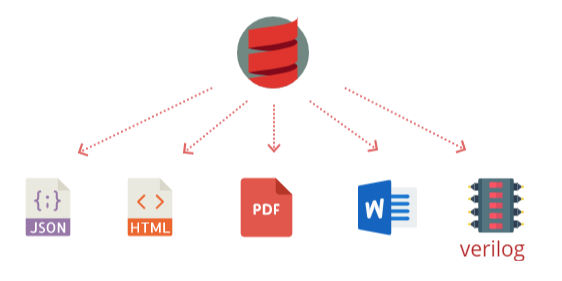
```scala
class RegBankExample extends Component{
    val io = new Bundle{
      apb = Apb3(Apb3Config(16,32))
    }
   val busSlave = BusInterface(io.apb,(0x0000, 100 Byte)
   val M_REG1  = busSlave.newReg(doc="REG1")
   ...
}
```
will auto generate RegBankExample.html under rtl dir,
you can also generate manully 
```scala
busSlave.document("RegIf.html")
```

###  Interrupt Example

a interrupt Example, there three triggers tx_done,rx_done,frame_end

You need manually add interrupt Enable/Mask/Status register interface like this

In [ ]:
class cpInterruptExample extends Component {
  val io = new Bundle {
    val tx_done, rx_done, frame_end = in Bool()
    val interrupt = out Bool()
    val apb = slave(Apb3(Apb3Config(16, 32)))
  }
  val busif = Apb3BusInterface(io.apb, (0x000, 100 Byte))

  val M_CP_INT_EN    = busif.newReg(doc="cp int enable register")
  val tx_int_en      = M_CP_INT_EN.field(1 bits, RW, doc="tx interrupt enable register")
  val rx_int_en      = M_CP_INT_EN.field(1 bits, RW, doc="rx interrupt enable register")
  val frame_int_en   = M_CP_INT_EN.field(1 bits, RW, doc="frame interrupt enable register")
  val M_CP_INT_MASK  = busif.newReg(doc="cp int mask register")
  val tx_int_mask      = M_CP_INT_MASK.field(1 bits, RW, doc="tx interrupt mask register")
  val rx_int_mask      = M_CP_INT_MASK.field(1 bits, RW, doc="rx interrupt mask register")
  val frame_int_mask   = M_CP_INT_MASK.field(1 bits, RW, doc="frame interrupt mask register")
  val M_CP_INT_STATE   = busif.newReg(doc="cp int state register")
  val tx_int_state      = M_CP_INT_STATE.field(1 bits, RW, doc="tx interrupt state register")
  val rx_int_state      = M_CP_INT_STATE.field(1 bits, RW, doc="rx interrupt state register")
  val frame_int_state   = M_CP_INT_STATE.field(1 bits, RW, doc="frame interrupt state register")

  when(io.rx_done && rx_int_en(0)){tx_int_state(0).set()}
  when(io.tx_done && tx_int_en(0)){tx_int_state(0).set()}
  when(io.frame_end && frame_int_en(0)){tx_int_state(0).set()}

  io.interrupt := (tx_int_mask(0) && tx_int_state(0)  ||
    rx_int_mask(0) && rx_int_state(0) ||
    frame_int_mask(0) && frame_int_state(0))
}
showRtl(new cpInterruptExample)

You can find this is a very tedious and repetitive work,   
a better way is creat a Factory fucntion by Macros auto complet those work instead manully creat them.
```scala
io.interrupt := interruptFactory2(busif,"M_CP", io.tx_done,io.rx_done,io.frame_end)
```
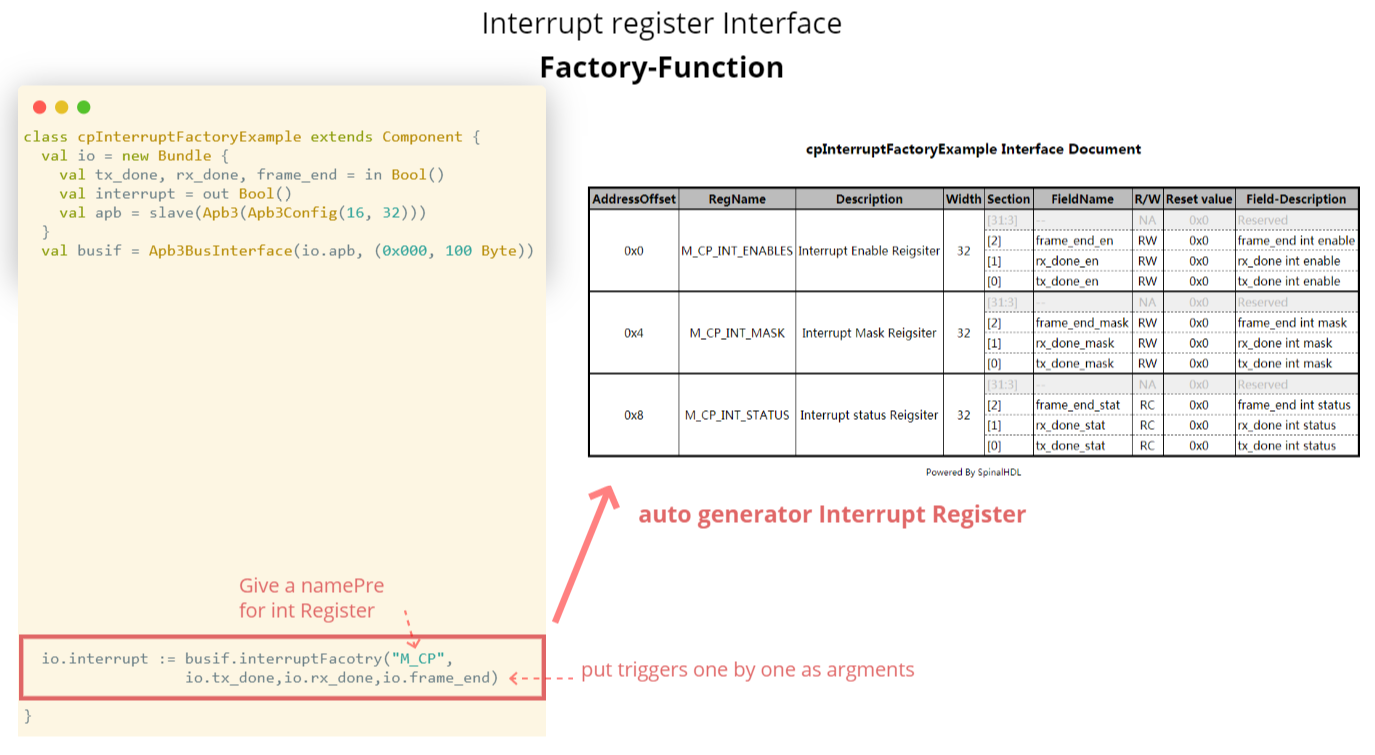

This is much more convenient than manually do that

In [ ]:
class cpInterruptFactoryExample extends Component {
  val io = new Bundle {
    val tx_done, rx_done, frame_end = in Bool()
    val interrupt = out Bool()
    val apb = slave(Apb3(Apb3Config(16, 32)))
  }
  val busif2 = Apb3BusInterface(io.apb, (0x000, 100 Byte))

  val tx = io.tx_done
  val rx = io.rx_done
  val frame = io.frame_end

  io.interrupt := InterruptFactory(busif2,"M_CP",tx,rx,frame)
}
showRtl(new cpInterruptExample)

<iframe src="./source/InterruptRegIf2.html"></iframe> 